In [1]:
%matplotlib inline
import pandas as pd

In [32]:
data=pd.read_csv('../food_truck.txt')

In [33]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [20]:
data[data['Profit']>24].head()

,Population,Profit
29,22.203,24.147


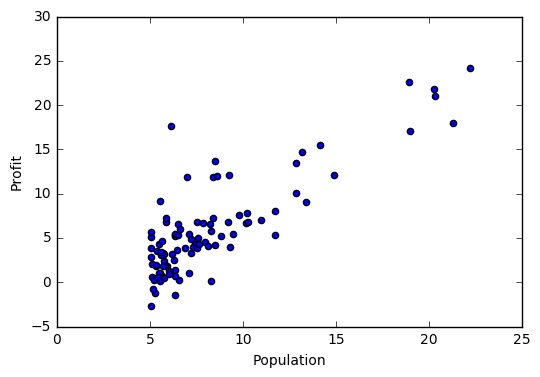

In [5]:
data.plot(x='Population',y='Profit',kind='scatter')

In [6]:
from sklearn import linear_model

In [7]:
ligres=linear_model.LinearRegression()

In [22]:
data.Population.shape

(97,)

In [24]:
data.shape[1]

2

In [8]:
model=ligres.fit(data['Population'].values.reshape(data.shape[0],1),data['Profit'].values)

In [9]:
model.coef_

array([ 1.19303364])

In [10]:
model.intercept_

-3.8957808783118519

In [11]:
model.predict(8.2)

array([ 5.887095])

In [12]:
import matplotlib.pyplot as plt
import numpy as np

In [1]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)  
f = model.intercept_ + model.coef_*x

fig, ax = plt.subplots()  
ax.plot(x, f, 'r', label='Prediction')  
ax.scatter(data.Population, data.Profit, label='Training Data')  

ax.set_ylim(0,100)
ax.legend(loc=2)  
ax.set_xlabel('Population')  
ax.set_ylabel('Profit')  
ax.set_title('Predicted Profit vs. Population Size')  

NameError: name 'np' is not defined

# Show a cross validation

In [14]:
from sklearn.model_selection import cross_val_predict

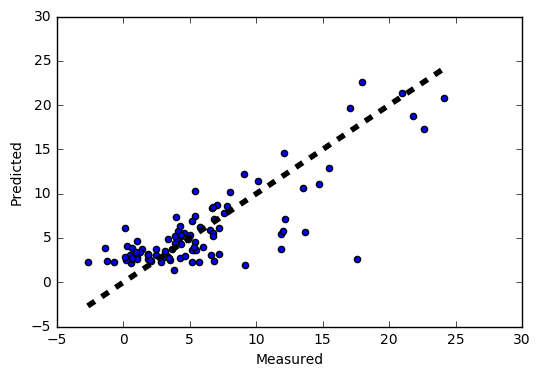

In [29]:
lr = linear_model.LinearRegression()
y=data.Profit.values
predicted = cross_val_predict(lr, data.Population.values.reshape(data.shape[0],1), data.Profit, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()